In [188]:
import matplotlib as mplt
import plotly as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier,KernelDensity
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB

In [4]:
data = pd.read_csv('data/treino.csv')

In [5]:
pd.DataFrame(data)

,id,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,y
0,0,6.564539,0.005402,-0.046048,0.082720,0.025483,0.012840,0.012074,0.015706,0.019474,...,0.004677,0.006341,0.004652,0.008265,0.001942,0.006023,0.003802,-0.006645,0.004731,teens
1,1,6.272916,-0.050610,0.079147,0.051565,0.039750,0.024608,0.007396,-0.000113,0.010413,...,0.000279,0.003451,0.004072,-0.001063,0.000887,-0.001818,0.000567,-0.004009,-0.002465,twenties
2,2,6.109420,0.149254,-0.024532,0.058759,0.024705,-0.005258,-0.011766,0.036307,-0.116146,...,-0.001559,0.002674,0.005249,-0.002725,0.000793,0.002473,0.002813,-0.004865,-0.006467,fourties
3,3,5.769757,0.118987,-0.142818,0.266039,-0.144302,0.062644,-0.036074,-0.007810,-0.059597,...,-0.004636,-0.006736,-0.009979,-0.004465,-0.007968,-0.008652,-0.008678,-0.012818,-0.003198,twenties
4,4,5.959087,0.199252,-0.126957,0.125780,-0.004105,-0.054833,-0.035830,-0.000890,-0.051578,...,-0.011336,-0.021308,-0.005701,-0.010904,-0.014085,-0.000995,-0.007513,-0.003199,-0.012306,teens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,5.984490,0.053315,-0.042023,0.047830,-0.019244,-0.046589,0.010900,-0.056706,-0.004145,...,0.003048,0.000266,-0.005563,0.001938,-0.003351,0.005081,-0.007575,0.005039,-0.010748,twenties
3496,3496,6.394997,0.071473,0.004922,0.005652,0.039168,-0.041011,0.015375,-0.058066,-0.004499,...,0.001090,-0.003133,-0.013673,-0.003264,-0.001776,-0.018846,0.005435,-0.009341,-0.003002,fifties
3497,3497,5.914190,0.345414,-0.117653,0.063194,-0.086075,0.086425,-0.175410,-0.005695,-0.025939,...,0.016025,-0.010143,-0.000345,0.000274,-0.002794,-0.002423,0.000475,0.003006,-0.010567,fourties
3498,3498,5.426918,0.271221,-0.023893,0.124361,-0.077775,0.033935,-0.113375,-0.007114,-0.022291,...,-0.001238,-0.006894,0.000604,-0.001819,-0.003945,-0.001115,-0.006675,-0.003233,-0.009256,teens


In [19]:
X = data.to_numpy()[:,1:39]
Y = data.to_numpy()[:,40]

In [21]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,6.564539,0.005402,-0.046048,0.08272,0.025483,0.01284,0.012074,0.015706,0.019474,-0.000007,...,0.005023,0.003625,0.004677,0.006341,0.004652,0.008265,0.001942,0.006023,0.003802,-0.006645
1,6.272916,-0.05061,0.079147,0.051565,0.03975,0.024608,0.007396,-0.000113,0.010413,-0.00969,...,-0.000273,0.009418,0.000279,0.003451,0.004072,-0.001063,0.000887,-0.001818,0.000567,-0.004009
2,6.10942,0.149254,-0.024532,0.058759,0.024705,-0.005258,-0.011766,0.036307,-0.116146,0.001421,...,-0.011399,0.014951,-0.001559,0.002674,0.005249,-0.002725,0.000793,0.002473,0.002813,-0.004865
3,5.769757,0.118987,-0.142818,0.266039,-0.144302,0.062644,-0.036074,-0.00781,-0.059597,0.002855,...,-0.002191,-0.011383,-0.004636,-0.006736,-0.009979,-0.004465,-0.007968,-0.008652,-0.008678,-0.012818
4,5.959087,0.199252,-0.126957,0.12578,-0.004105,-0.054833,-0.03583,-0.00089,-0.051578,-0.050316,...,-0.006348,-0.024509,-0.011336,-0.021308,-0.005701,-0.010904,-0.014085,-0.000995,-0.007513,-0.003199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,5.98449,0.053315,-0.042023,0.04783,-0.019244,-0.046589,0.0109,-0.056706,-0.004145,-0.027816,...,0.006983,-0.005505,0.003048,0.000266,-0.005563,0.001938,-0.003351,0.005081,-0.007575,0.005039
3496,6.394997,0.071473,0.004922,0.005652,0.039168,-0.041011,0.015375,-0.058066,-0.004499,-0.003758,...,-0.001253,0.010728,0.00109,-0.003133,-0.013673,-0.003264,-0.001776,-0.018846,0.005435,-0.009341
3497,5.91419,0.345414,-0.117653,0.063194,-0.086075,0.086425,-0.17541,-0.005695,-0.025939,-0.050318,...,0.01193,-0.014447,0.016025,-0.010143,-0.000345,0.000274,-0.002794,-0.002423,0.000475,0.003006
3498,5.426918,0.271221,-0.023893,0.124361,-0.077775,0.033935,-0.113375,-0.007114,-0.022291,-0.024963,...,0.002514,-0.011851,-0.001238,-0.006894,0.000604,-0.001819,-0.003945,-0.001115,-0.006675,-0.003233


In [29]:
np.array(data.isna().sum()).T

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [30]:
from sklearn.preprocessing import StandardScaler

scaler_dataset = StandardScaler()
scalerX = scaler_dataset.fit_transform(X)

In [31]:
pd.DataFrame(scalerX)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,1.378480,-1.003322,0.370590,-0.447544,1.066521,-0.154324,1.135854,0.196702,1.553227,0.416012,...,0.134192,0.973653,0.392797,1.145810,-0.088673,1.218210,-0.110978,0.975874,0.183887,-0.246275
1,0.851731,-1.455165,1.709627,-0.782962,1.226602,0.070724,1.048709,-0.246452,1.253224,0.050096,...,-0.303402,1.577698,-0.093371,0.916897,-0.123995,0.535096,-0.193021,0.254142,-0.057230,0.044685
2,0.556414,0.157128,0.600716,-0.705509,1.057789,-0.500441,0.691746,0.773803,-2.937139,0.469958,...,-1.222589,2.154521,-0.296599,0.855281,-0.052297,0.413379,-0.200325,0.649125,0.110205,-0.049830
3,-0.057107,-0.087033,-0.664421,1.526069,-0.838555,0.798143,0.238914,-0.462097,-1.064809,0.524149,...,-0.461809,-0.591053,-0.636624,0.109890,-0.979622,0.285934,-0.881165,-0.374890,-0.746193,-0.927431
4,0.284873,0.560469,-0.494777,0.016042,0.734531,-1.448528,0.243465,-0.268225,-0.799279,-1.485199,...,-0.805227,-1.959610,-1.377247,-1.044531,-0.719144,-0.185598,-1.356639,0.329903,-0.659358,0.134061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,0.330757,-0.616802,0.413643,-0.823178,0.564658,-1.290865,1.113979,-1.831854,0.771193,-0.634927,...,0.296064,0.021758,0.212704,0.664564,-0.710725,0.754900,-0.522368,0.889174,-0.664043,1.043147
3496,1.072242,-0.470329,0.915750,-1.277265,1.220072,-1.184190,1.197352,-1.869954,0.759495,0.274242,...,-0.384364,1.714251,-0.003692,0.395312,-1.204614,0.373917,-0.399988,-1.313187,0.305578,-0.543704
3497,0.203777,1.739550,-0.395273,-0.657763,-0.185221,1.252935,-2.356724,-0.402829,0.049628,-1.485292,...,0.704750,-0.910493,1.647109,-0.160035,-0.393003,0.633020,-0.479062,0.198482,-0.064061,0.818754
3498,-0.676365,1.141040,0.607555,0.000765,-0.092084,0.249094,-1.201087,-0.442584,0.170389,-0.527088,...,-0.073122,-0.639864,-0.261027,0.097353,-0.335203,0.479727,-0.568499,0.318853,-0.596951,0.130308


In [36]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

Y_new = labelEncoder.fit_transform(Y)
pd.DataFrame(Y_new).T

,0,1,2,3,4,5,6,7,8,9,...,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499
0,2,4,1,4,2,4,2,4,2,2,...,2,0,1,0,1,4,0,1,2,1


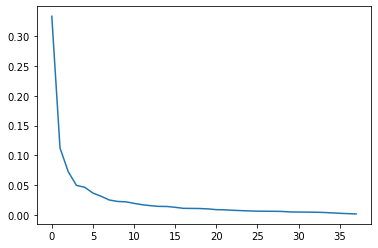

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=38)
pca.fit(scalerX)
mplt.pyplot. plot(pca.explained_variance_ratio_)

In [182]:
X_new = pca.fit_transform(scalerX)
X_new = X_new[:,0:19]
pd.DataFrame(X_new)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.406746,-1.757861,-1.032079,-1.740311,-3.780888,-0.088390,-0.872862,-0.639933,-0.835053,-0.034864,0.090944,-0.981317,-0.603975,0.673870,-1.007846,-0.004796,0.309258,0.011688,0.002780
1,-2.715627,-2.133321,-1.417382,-1.873315,-1.362573,-0.849684,-0.008278,0.065687,-0.119868,0.259182,-0.780223,-0.168694,-0.360002,0.049562,-0.430735,0.075925,-0.322622,0.052308,-0.639920
2,-2.484386,0.323999,-3.206478,2.526927,0.059636,-1.721671,-0.740100,1.789304,2.305374,2.049909,0.242429,-0.559294,0.237987,0.594784,1.247631,1.509318,-0.284030,-0.118370,-0.547691
3,0.108833,2.578954,-0.444338,0.648170,-0.210911,-0.972127,-0.093993,-0.486955,0.530831,-0.705285,0.122065,-0.481001,1.030251,0.606135,-0.473561,1.091121,-1.030064,0.741278,0.760046
4,-1.267032,0.051067,2.305918,0.157324,2.084928,-0.624489,1.302803,-1.453970,1.698518,0.296540,0.945941,0.124416,2.033805,0.328436,0.211825,-1.068866,0.194691,-0.891241,0.777897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,-2.834539,-1.730848,1.385598,-0.662076,0.100226,0.863544,-0.304638,0.044718,-0.405802,0.904892,0.282661,0.853090,-0.085464,-0.020141,-1.156355,-0.180783,0.168348,0.293620,0.297654
3496,-1.718821,-0.692025,-1.378293,-1.713287,-0.083717,1.633149,-2.178363,-0.922653,-0.293486,1.367197,0.016274,0.024213,-0.340252,-0.965881,-1.677340,-0.307132,-0.657736,1.208754,-0.085879
3497,0.548861,0.376294,3.670366,-0.208585,1.297900,0.366485,2.523597,0.696781,0.453064,-0.296544,1.221252,-0.491755,-2.282720,0.562616,0.178509,-0.713014,0.142316,0.456413,0.826055
3498,-0.811053,1.069151,0.497633,0.943054,0.953761,-0.264631,1.031154,0.165932,1.021044,-1.099780,0.249297,0.392123,-0.385520,0.043313,-0.485987,-0.251332,1.273958,0.867617,-0.828961


# Train Dataset

In [183]:
models = [KNeighborsClassifier(n_neighbors=2), KernelDensity(kernel='gaussian', bandwidth=0.01),
          SVC(),GaussianMixture(n_components=2, random_state=0),GaussianNB()]

folders = 5
bestAcuracia = 0
acuracias = np.zeros((folders,5))
i = 0
train_x, test_x, train_y, test_y = train_test_split(X_new, Y_new, test_size=0.5)
for model in models:
    
    acuracias[:,i] = cross_val_score(model, train_x, train_y, cv=folders)
    nome_modelo = type(model).__name__ 
    print('Modelo: {} | Média acurácia: {:.2} | Desvio acurácia: {:.2}'.format(nome_modelo,
                                    np.mean(acuracias[:,i]), np.std(acuracias[:,i])))
    i = i + 1
    
    if(acuracias[:,i])

Modelo: KNeighborsClassifier | Média acurácia: 0.87 | Desvio acurácia: 0.0082
Modelo: KernelDensity | Média acurácia: -1.2e+07 | Desvio acurácia: 3.5e+05
Modelo: SVC | Média acurácia: 0.84 | Desvio acurácia: 0.011
Modelo: GaussianMixture | Média acurácia: -2.5e+01 | Desvio acurácia: 0.15
Modelo: GaussianNB | Média acurácia: 0.69 | Desvio acurácia: 0.029


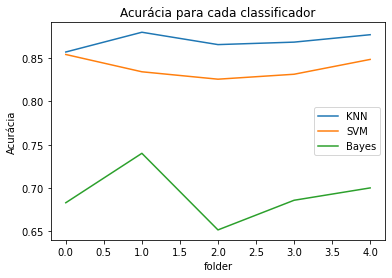

In [184]:
mplt.pyplot.plot(acuracias[:,0], label= 'KNN')
mplt.pyplot.plot(acuracias[:,2], label = 'SVM')
mplt.pyplot.plot(acuracias[:,4], label = 'Bayes')

mplt.pyplot.ylabel("Acurácia")
mplt.pyplot.xlabel("folder")
mplt.pyplot.title("Acurácia para cada classificador")

mplt.pyplot.legend()

In [186]:
KNN = KNeighborsClassifier(n_neighbors=2)
KNN.fit(train_x, train_y)

yAprox = KNN.predict(test_x)

In [189]:
accuracy_score(test_y,yAprox)

0.8777142857142857

# Validação do modelo escolhido

In [192]:
validacao = pd.read_csv('data/validacao.csv')
np.array(validacao.isna().sum()).T

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [195]:
scalerValidacao = scaler_dataset.fit_transform(validacao)
pd.DataFrame(scalerValidacao)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-1.730896,0.861874,-0.471237,0.706345,-0.680666,0.862733,-1.617987,0.407664,-0.878618,-0.948426,...,-0.761287,-1.131259,0.609620,-0.995022,0.370730,-0.626438,0.475344,-0.660091,-0.005865,-0.238215
1,-1.728587,-0.664380,0.051656,-0.471569,0.780259,-0.969213,-0.346389,-0.212474,0.368880,-0.413735,...,-0.151663,-0.086178,-0.032753,-0.619186,-0.369977,-0.768701,-0.578962,-1.094388,-0.113741,-2.104182
2,-1.726278,-0.407921,-2.359133,2.058675,-0.640609,0.828979,-1.028463,0.450860,0.201976,-0.176629,...,1.199506,0.441331,0.738441,0.514951,0.348574,-0.144234,0.458416,0.035713,0.262807,1.264084
3,-1.723968,-0.155173,-0.022254,-1.141933,0.534196,0.043311,0.097360,-0.834179,-1.089332,-0.951271,...,-1.165644,-0.634050,0.207878,-0.632746,0.177272,-0.326398,0.583325,-0.653325,0.050455,-1.087959
4,-1.721659,-0.003543,0.499036,-0.731296,0.482705,-0.560082,1.523112,-0.725269,-1.095198,-0.463613,...,-0.322472,0.283599,0.188681,-1.059398,0.490410,-1.030556,0.055513,-1.241432,-0.295280,-0.589284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1.721659,-0.575439,-0.907649,0.297734,-1.325566,0.481931,-0.804642,1.269341,0.313881,-1.142180,...,1.560091,-0.322882,0.134915,0.130854,0.288938,-0.161588,0.731213,-0.743404,0.828803,-0.725485
1496,1.723968,-0.232181,0.584387,-0.959646,0.204542,-0.806137,1.667782,0.443460,0.475501,0.403964,...,-0.242574,-0.789879,-0.050530,-1.074078,-0.666008,-0.764810,-0.661276,-0.772811,0.241462,0.624658
1497,1.726278,0.391231,-2.178090,0.599377,-0.828073,0.667530,-0.574986,0.505592,-0.101937,0.959846,...,0.782517,-0.246641,0.798889,-0.297001,0.453657,-0.223878,0.430044,-0.376763,0.890411,0.973699
1498,1.728587,1.090199,-0.719411,1.015840,-1.386465,0.897716,-0.438315,1.018150,0.089338,0.893363,...,0.996930,0.222051,0.664430,-0.658014,-0.251669,-0.875710,-0.912464,-0.117922,-0.023751,1.666164


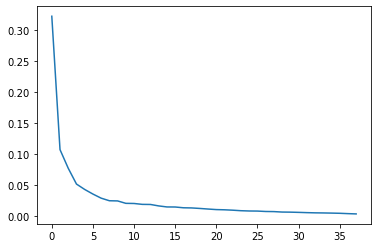

In [198]:
X_validacao = pca.fit_transform(scalerValidacao)
X_validacao = X_validacao[:,0:19]
mplt.pyplot. plot(pca.explained_variance_ratio_)

In [205]:
result = KNN.predict(X_validacao)
result = labelEncoder.inverse_transform(result)

In [207]:
resultDataset = validacao
resultDataset['label'] = result
resultDataset

,id,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,X31,X32,X33,X34,X35,X36,X37,X38,result,label
0,3500,6.281532,0.078875,-0.013507,0.060021,0.007168,-0.060195,-0.025819,-0.022116,-0.056822,...,-0.000470,-0.010035,-0.003005,-0.004482,0.000577,-0.007103,-0.004305,-0.007373,fourties,fourties
1,3501,5.432066,0.142372,-0.125442,0.195959,-0.156531,0.004840,-0.059756,0.021767,-0.040690,...,-0.008459,-0.004056,-0.013167,-0.006275,-0.010601,-0.012883,-0.005265,-0.017870,fourties,fourties
2,3502,5.574803,-0.150383,0.115002,0.063748,0.004152,-0.030044,-0.023455,0.015896,-0.033536,...,0.001132,0.013986,-0.003309,0.001597,0.000398,0.002158,-0.001913,0.001077,fourties,fourties
3,3503,5.715475,0.133397,-0.189146,0.173063,-0.066054,0.027535,-0.093779,-0.029529,-0.056908,...,-0.005466,-0.004272,-0.005659,-0.000700,0.001722,-0.007013,-0.003803,-0.012153,thirties,thirties
4,3504,5.799868,0.196700,-0.150124,0.168272,-0.119972,0.100454,-0.087818,-0.029735,-0.042195,...,-0.005705,-0.011059,-0.001363,-0.009576,-0.003874,-0.014840,-0.006881,-0.009348,twenties,twenties
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,4995,5.481568,0.025879,-0.052337,0.000014,-0.026860,-0.018597,0.021336,0.019832,-0.062668,...,-0.006373,0.007875,-0.004127,0.001378,0.003290,-0.008212,0.003125,-0.010114,twenties,twenties
1496,4996,5.672615,0.207065,-0.171823,0.142389,-0.141959,0.107853,-0.023860,0.025517,-0.016019,...,-0.008680,-0.011293,-0.017228,-0.006226,-0.011474,-0.008603,-0.002103,-0.002520,teens,teens
1497,4997,6.019587,-0.128398,-0.023672,0.046305,-0.010275,-0.006851,-0.020460,0.005205,0.000753,...,0.001884,0.001069,-0.001867,0.000593,0.000097,-0.003332,0.003674,-0.000556,twenties,twenties
1498,4998,6.408611,0.048737,0.015904,-0.005653,0.010294,0.000139,0.007590,0.011933,-0.001253,...,0.000212,-0.004674,-0.011544,-0.007624,-0.014137,0.000113,-0.004464,0.003339,teens,teens


In [218]:
generateCSV = resultDataset[['id','label']]


In [219]:
generateCSV

,id,label
0,3500,fourties
1,3501,fourties
2,3502,fourties
3,3503,thirties
4,3504,twenties
...,...,...
1495,4995,twenties
1496,4996,teens
1497,4997,twenties
1498,4998,teens


In [220]:
generateCSV.to_csv('data/result/sample.csv')